## Network Intrusion Detector

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## read the dataset
df1=pd.read_csv("tcp.csv")

In [3]:
## first five rows
pd.set_option('display.max_columns',None)
df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serrer_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,142,0.0,0.0,0.0,0.0,1.00,0.00,0.01,139,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.0,0.0,0.0,1.00,0.00,1.00,5,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,6,1.0,1.0,0.0,0.0,0.03,0.07,0.00,255,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [4]:
df1.shape

(494021, 42)

<i>There are 494021 rows and 42 columns</i>

In [5]:
df1.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<i>There are no Null values.</i>

In [6]:
df1.duplicated().sum()

348435

<i>There are a lot of duplicates in it. Almost 70%.</i>

In [7]:
cols=[]
for i in df1.columns:
    if(df1[i].nunique()<=23):
        cols.append(i)

In [8]:
for i in cols:
    print(df1[i].value_counts())
    print("=====================================================")

b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: protocol_type, dtype: int64
b'SF'        378440
b'S0'         87007
b'REJ'        26875
b'RSTR'         903
b'RSTO'         579
b'SH'           107
b'S1'            57
b'S2'            24
b'RSTOS0'        11
b'S3'            10
b'OTH'            8
Name: flag, dtype: int64
0    493999
1        22
Name: land, dtype: int64
0    492783
3       970
1       268
Name: wrong_fragment, dtype: int64
0    494017
1         2
3         1
2         1
Name: urgent, dtype: int64
0     490829
2       2192
28       274
1        256
4        112
6        104
5         51
3         38
14        37
30        28
22        28
19        23
18        13
24        13
20        10
7          5
17         2
12         2
15         1
16         1
10         1
9          1
Name: hot, dtype: int64
0    493958
1        57
2         3
5         1
4         1
3         1
Name: num_failed_logins, dtype: int64
0    420784
1     73237
Name: logged_in, dtype: int6

<i>There is only 1 value in num_outbound_cmds and is_host_login. These columns will not help in modelling. So we need to remove them.</i>

In [9]:
df1.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serrer_rate          

<i>All datatypes are correct.</i>

In [10]:
df2=df1.copy()

<b>Filter out all the strings</b>

In [11]:
for i in ['protocol_type','service','flag','intrusion']:
    df2[i]=df2[i].str.strip("(b')(\+)(.')")

In [12]:
df2.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serrer_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,udp,domain_u,SF,44,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,142,0.0,0.0,0.0,0.0,1.00,0.00,0.01,139,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,normal
1,0,tcp,smtp,SF,1489,385,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.0,0.0,0.0,1.00,0.00,1.00,5,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,normal
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
4,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,6,1.0,1.0,0.0,0.0,0.03,0.07,0.00,255,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune


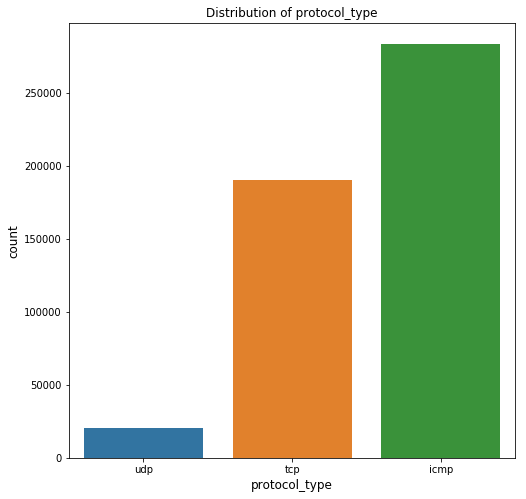

In [13]:
plt.figure(figsize=(8,8))
plt.title("Distribution of protocol_type")
sns.countplot(x=df2['protocol_type'])
plt.xlabel("protocol_type",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.show()

<i> Most connections use icmp protocol, least numbers use udp protocol.</i>

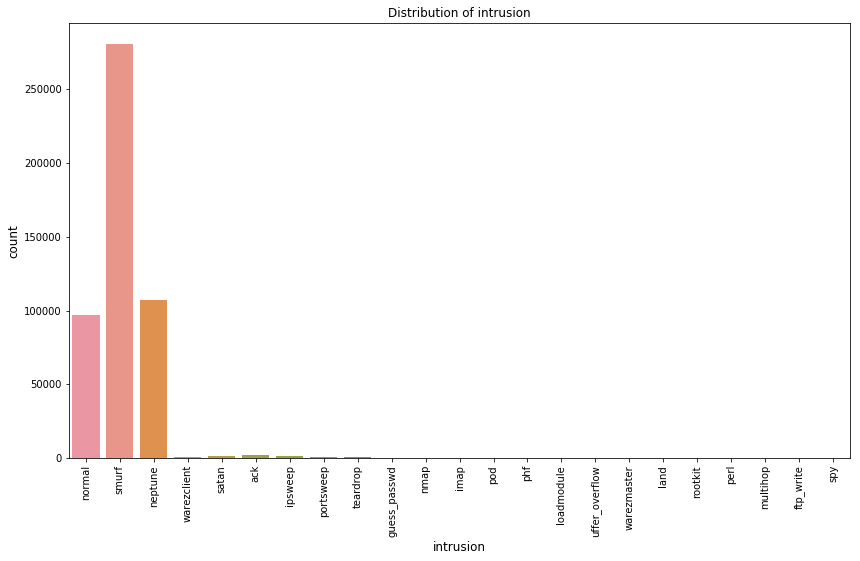

In [14]:
plt.figure(figsize=(14,8))
plt.title("Distribution of intrusion")
sns.countplot(x=df2['intrusion'])
plt.xticks(rotation=90)
plt.xlabel("intrusion",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.show()

<i>1. Most instrusions are smurf and neptune attacks. They are in high number as compared to other types of intrusions.</i><br>
<i>2. The target column is not evenly distributed which might affect the model accuracy.</i><br>
<i>3. The low valued intrusions might be identified as outliers, so if we perform outlier removal, these rows might get removed.</i>

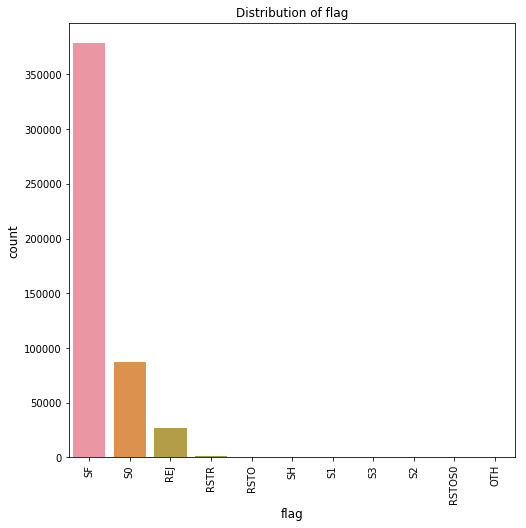

In [15]:
plt.figure(figsize=(8,8))
plt.title("Distribution of flag")
sns.countplot(x=df2['flag'])
plt.xticks(rotation=90)
plt.xlabel("flag",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.show()

<i>1. Most flags are SF,SO and REJ.</i><br>
<i>2. Also we can see that all other flags are in very few numbers, this might identified as an outlier. So outliers removal might remove such rows.</i>

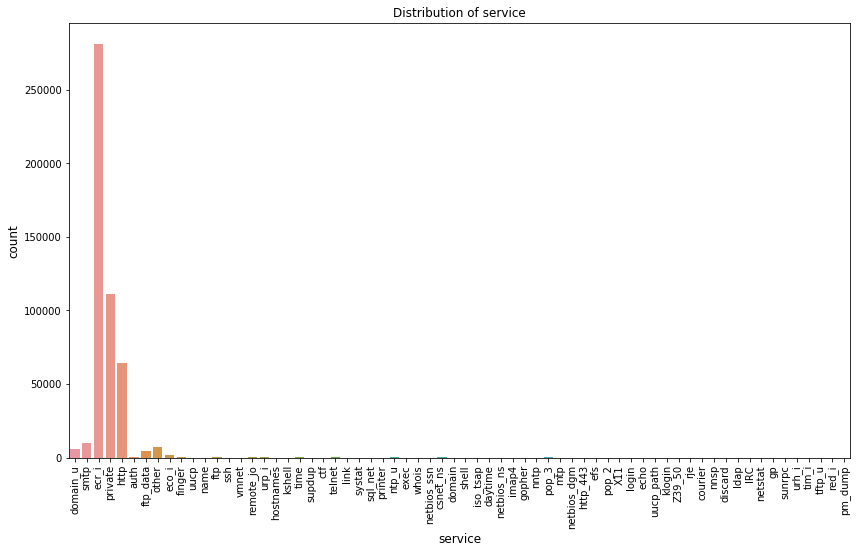

In [16]:
plt.figure(figsize=(14,8))
plt.title("Distribution of service")
sns.countplot(x=df2['service'])
plt.xticks(rotation=90)
plt.xlabel("service",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.show()

<i>From graph :</i><br>
<i>1. The service column is not equally distributed.</i><br>
<i>2. False outlier identification might occur.</i><br>
<i>3. Most services are ecr_i, private and http.</i> <br>

In [17]:
## assigning values to x and y
x=df2.drop(['intrusion','num_outbound_cmds','is_host_login'],axis=1)
y=df2['intrusion']

<b>Encoding</b>

In [18]:
## Label encoding
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for i in ['flag','service']:
    x[i]=label_en.fit_transform(x[i])
##y=label_en.fit_transform(y)

In [19]:
## one hot encoding protocol_type
x=pd.get_dummies(x, columns = ['protocol_type'])

In [20]:
x.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serrer_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,10,9,44,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,142,0.0,0.0,0.0,0.0,1.00,0.00,0.01,139,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,0,0,1
1,0,50,9,1489,385,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,0.0,0.0,0.0,0.0,1.00,0.00,1.00,5,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,0,1,0
2,0,13,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,1,0,0
3,0,13,9,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,1,0,0
4,0,45,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,6,1.0,1.0,0.0,0.0,0.03,0.07,0.00,255,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,0,1,0


In [21]:
## scaling other numeric datatypes
from sklearn.preprocessing import Normalizer
sc = Normalizer()
for i in ['duration','src_bytes','src_bytes','dst_bytes','num_compromised','num_root','count','srv_count','dst_host_count','dst_host_srv_count']:
    x[[i]]=sc.fit_transform(x[[i]])
x=pd.DataFrame(x)

In [22]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit1 = bestfeatures.fit(x,y)

In [23]:
dfscores = pd.DataFrame(fit1.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                       Specs         Score
1                    service  3.496619e+06
8                        hot  2.157457e+06
6             wrong_fragment  1.389256e+06
5                       land  4.715437e+05
11           num_compromised  4.576903e+05
9          num_failed_logins  3.903540e+05
4                  dst_bytes  3.369904e+05
35  dst_host_srv_serror_rate  3.109461e+05
22           srv_serrer_rate  3.106110e+05
21               serror_rate  3.103882e+05


<i> These are the important columns in the dataset. So we also can make a model based on only with these features also.</i>

In [24]:
## data spiliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

<b>Gaussian Naive Bayes</b>

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(y_test,y_pred))
print("F1 - score :",f1_score(y_test,y_pred, average='weighted'))

0.8218511208946916
F1 - score : 0.8383531135507444


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


<b>Bernoulli Naive Bayes</b>

In [27]:
from sklearn.naive_bayes import BernoulliNB
classifier2=BernoulliNB()
classifier2.fit(x_train,y_train)
y_pred=classifier2.predict(x_test)

In [28]:
print(accuracy_score(y_test,y_pred))
print("F1 - score :",f1_score(y_test,y_pred,average='weighted'))

0.9839380598147867
F1 - score : 0.9867168308568744


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [29]:
y_pred[1:10]

array(['neptune', 'neptune', 'normal', 'smurf', 'normal', 'neptune',
       'neptune', 'normal', 'smurf'], dtype='<U14')

In [30]:
y_test[1:10]

171422    neptune
312181    neptune
87346      normal
57449       smurf
296193     normal
71649     neptune
493765    neptune
340586     normal
410705      smurf
Name: intrusion, dtype: object

<i>The Bernoulli Naive Bayes model produced an accuracy of 98%. This model can be used for identifing the types of intruders and normal connections.</i>